In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv('marketing.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           2010 non-null   int64  
 1   Age                  2010 non-null   int64  
 2   Gender               2010 non-null   object 
 3   Income               1931 non-null   float64
 4   CampaignChannel      1856 non-null   object 
 5   CampaignType         2010 non-null   object 
 6   AdSpend              2010 non-null   object 
 7   ClickThroughRate     2010 non-null   float64
 8   ConversionRate       2010 non-null   float64
 9   WebsiteVisits        2010 non-null   int64  
 10  PagesPerVisit        2010 non-null   float64
 11  TimeOnSite           1931 non-null   float64
 12  SocialShares         2010 non-null   int64  
 13  EmailOpens           2010 non-null   int64  
 14  EmailClicks          2010 non-null   int64  
 15  PreviousPurchases    2010 non-null   i

In [7]:
df.isna().sum()

CustomerID               0
Age                      0
Gender                   0
Income                  79
CampaignChannel        154
CampaignType             0
AdSpend                  0
ClickThroughRate         0
ConversionRate           0
WebsiteVisits            0
PagesPerVisit            0
TimeOnSite              79
SocialShares             0
EmailOpens               0
EmailClicks              0
PreviousPurchases        0
LoyaltyPoints            0
AdvertisingPlatform      0
AdvertisingTool          0
Conversion               0
dtype: int64

<H1>Univariate

In [8]:
#Add functions for Univariate analysis
def describe_numerical_col(df, col_name):
    info = df[[col_name]].describe().to_dict()[col_name]
    info['shapiro'] = f'{stats.shapiro(df[col_name])[1]: .5f}'
    info['normal'] = float(info['shapiro']) > 0.05
    info['missing'] = df[col_name].isna().sum()
    info['skew'] = f'{stats.skew(df[col_name]):.5f}'
    info['type'] = ('slight ' if info['normal'] else '') +\
        ('right(positive)' if float(info['skew']) > 0 else 'left(negative)') + '-skew'

    fig, ax = plt.subplots(2, 2, figsize=(16, 7), gridspec_kw={'height_ratios':(.85, .15)})
    sns.histplot(df[col_name], kde=True, ax=ax[0, 0], color='#55A868')
    sns.boxplot(df[col_name], orient='h', ax=ax[1, 0], color="#5583A8")
    counts, bin_edges = np.histogram(df[col_name], bins=10, density = True)
    pdf = counts / (sum(counts))
    cdf = np.cumsum(pdf)
    ax[1, 1] = plt.subplot(122)
    plt.plot(bin_edges[1:], pdf, label='PDF')
    plt.plot(bin_edges[1:], cdf, label='CDF')
    plt.legend()
    ax[0, 0].set_xticklabels([])
    ax[1, 0].set_yticklabels([])
    ax[0, 0].set_xlabel('')
    ax[0, 0].set_ylabel('Count')
    fig.suptitle(col_name, fontsize=30)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    info_df = pd.DataFrame.from_dict(info, orient='index', columns=[''])
    print('='*18 + ' ' +col_name + ' ' + '='*18)
    print(info_df)
    print('='*40)
    
def categorize_numerical_col(col_name, bins, bins_name):
    new_col = f'{col_name}_categorized'
    df[new_col] = pd.cut(df[col_name], bins=bins, labels=bins_name)

def describe_categorical_col(df, col_name):
    counts = pd.DataFrame(df[col_name].value_counts()).reset_index()
    counts.columns = ['Group', 'Count']
    total = sum(counts['Count'])
    counts['%'] = (counts['Count'] / total * 100).round(2)

    fig = px.pie(
        counts,
        names='Group',
        values='Count',
        title=f'<b>Distribution of {col_name} in each group</b>',
        color='Group',
        hole=0.3
    )

    fig.update_traces(
        textposition='inside',
        textinfo='percent+label',

    )

    fig.update_layout(
        title_x=0.5,
        legend_title_text='Groups',
        font=dict(family="Arial, sans-serif", size=14)
    )
    fig.show()
    print('='*18 + ' ' +col_name + ' ' + '='*18)
    print(counts)
    print('='*40)
    # plt.figure(figsize=(12, 7))
    # ax = sns.barplot(
    #     data=counts,
    #     x=counts[col_name],
    #     y=counts['count'],
    #     palette='viridis'
    # )

    # for i in range(len(ax.patches)):
    #     p = ax.patches[i]
    #     percentage = counts['percents'][i]
    #     ax.annotate(f'{percentage:.2f}%',
    #                 (p.get_x() + p.get_width()/2., p.get_height()),
    #                 ha='center', va='center',
    #                 fontsize=11, color='black',
    #                 xytext=(0, 10),
    #                 textcoords='offset points')
    
    # plt.ylim(0, max(counts['count']) * 1.15)
    # ax.set_xlabel('')
    # ax.set_title(f'Distribution of {col_name} in each group')
    # plt.show()


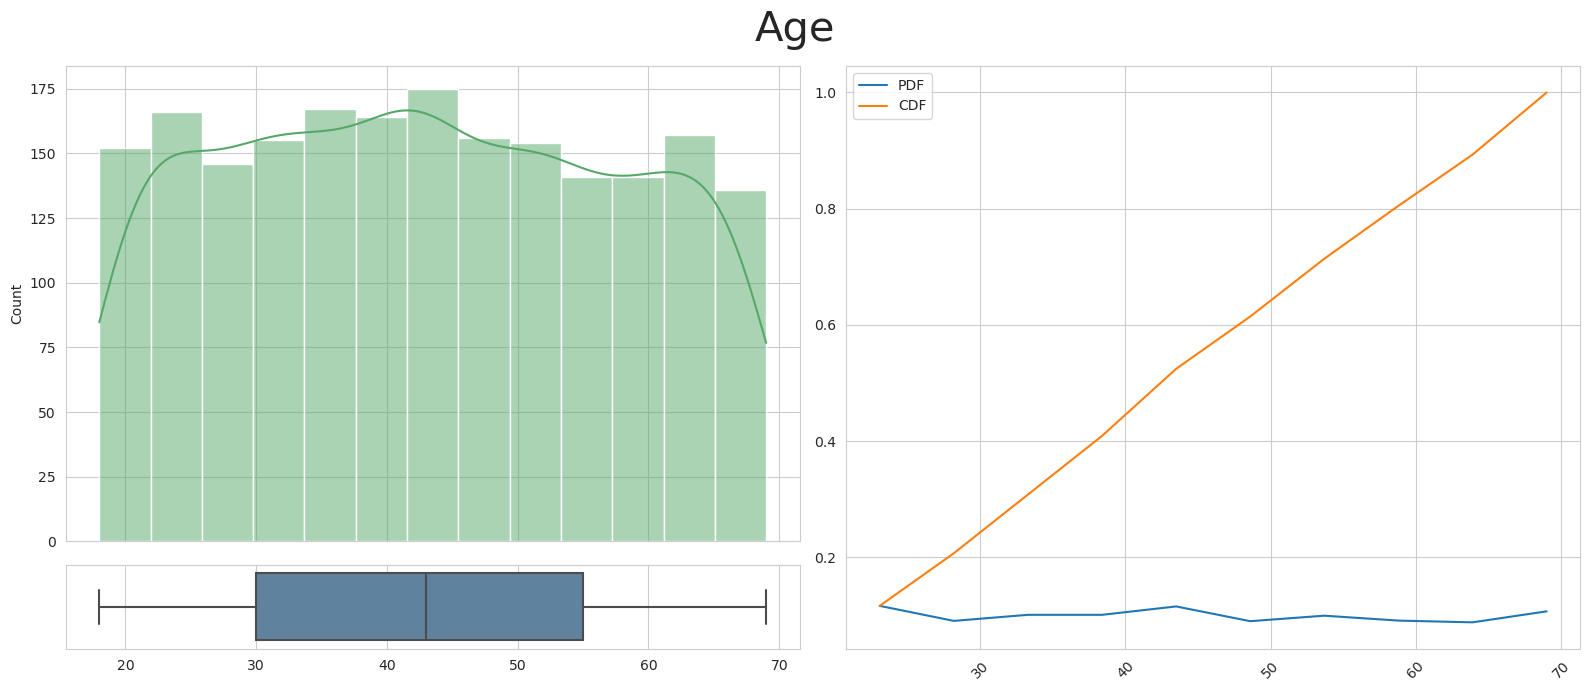

================== Age ==================
                             
count                  2010.0
mean                43.010448
std                 14.740003
min                      18.0
25%                      30.0
50%                      43.0
75%                      55.0
max                      69.0
shapiro               0.00000
normal                  False
missing                     0
skew                  0.04478
type     right(positive)-skew


In [9]:
describe_numerical_col(df, 'Age')

In [215]:
bins=[18, 30, 45, 60, 70]
bin_labels = ['Young', 'Adult', 'Middle-Aged', 'Old']
categorize_numerical_col('Age', bins=bins, bins_name=bin_labels)


In [216]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,Age_categorized
0,13300,36,Female,47648.0,Email,Consideration,893.7554921892273,0.132078,0.198063,38,...,11.923316,9,3,6,1,1139,IsConfid,ToolConfid,1,Adult
1,10429,32,Female,47491.0,Email,Consideration,7330.251375088103,0.120810,0.088416,27,...,NaN,33,0,2,4,3772,IsConfid,ToolConfid,1,Adult
2,10557,52,Male,83830.0,Referral,Awareness,7720.360685483039,0.125472,0.082197,35,...,0.660581,29,1,3,0,3611,IsConfid,ToolConfid,1,Middle-Aged
3,12602,52,Male,116342.0,Social Media,Consideration,8337.45315727269,0.158739,0.089032,25,...,12.218421,72,3,7,4,1173,IsConfid,ToolConfid,1,Middle-Aged
4,8592,58,Female,90994.0,Email,Retention,5273.098832292671,0.226054,0.099792,13,...,4.894079,41,16,7,0,1102,IsConfid,ToolConfid,1,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,10403,25,Female,88745.0,Email,Consideration,6781.038905721557,0.255968,0.102050,18,...,14.300916,37,12,1,8,4229,IsConfid,ToolConfid,1,Young
2006,9208,50,Female,109895.0,PPC,Conversion,4190.031761180359,0.268642,0.070013,45,...,6.933904,3,0,2,4,1976,IsConfid,ToolConfid,1,Middle-Aged
2007,10725,37,Male,107049.0,SEO,Awareness,5092.916277216971,0.287963,0.010459,34,...,0.501684,0,9,6,7,1066,IsConfid,ToolConfid,1,Adult
2008,10945,42,Female,32420.0,Referral,Consideration,7902.972421750569,0.154523,0.055544,46,...,9.375551,10,6,4,3,3576,IsConfid,ToolConfid,1,Adult


In [217]:
describe_categorical_col(df, 'Age_categorized')

================== Age_categorized ==================
         Group  Count      %
0        Adult    619  31.31
1  Middle-Aged    558  28.22
2        Young    473  23.93
3          Old    327  16.54


In [289]:
def plot_numerical_vs_target(df, num_col, target_col):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    # First plot: A histogram of two groups
    sns.histplot(data=df[[num_col, target_col]],
                x=num_col, hue=target_col,
                kde=True,
                ax=ax[0, 0],
                element='step',
                palette='Pastel1',
                alpha=0.7)
    ax[0, 0].set_xlabel('')
    legend = ax[0, 0].get_legend()
    handles = legend.legend_handles
    ax[0, 0].legend(handles, ['No', 'Yes'], title=target_col)

    # Second plot: Box plots of two Groups
    sns.boxplot(data = df, x=target_col, y=num_col, palette='Pastel1', ax=ax[0, 1])
    ax[0, 1].set_xticklabels([])
    ax[0, 1].set_xlabel('')
    # Third plot: Violen plot
    sns.violinplot(data=df, x=target_col, y=num_col, palette='Pastel1', ax=ax[1, 1])
    ax[1, 1].set_xticks([0, 1], ['No', 'Yes'])
    # Forth plot: Q-Q plot
    stats.probplot(df[num_col], plot=ax[1, 0])
    fig.tight_layout()
    plt.show()

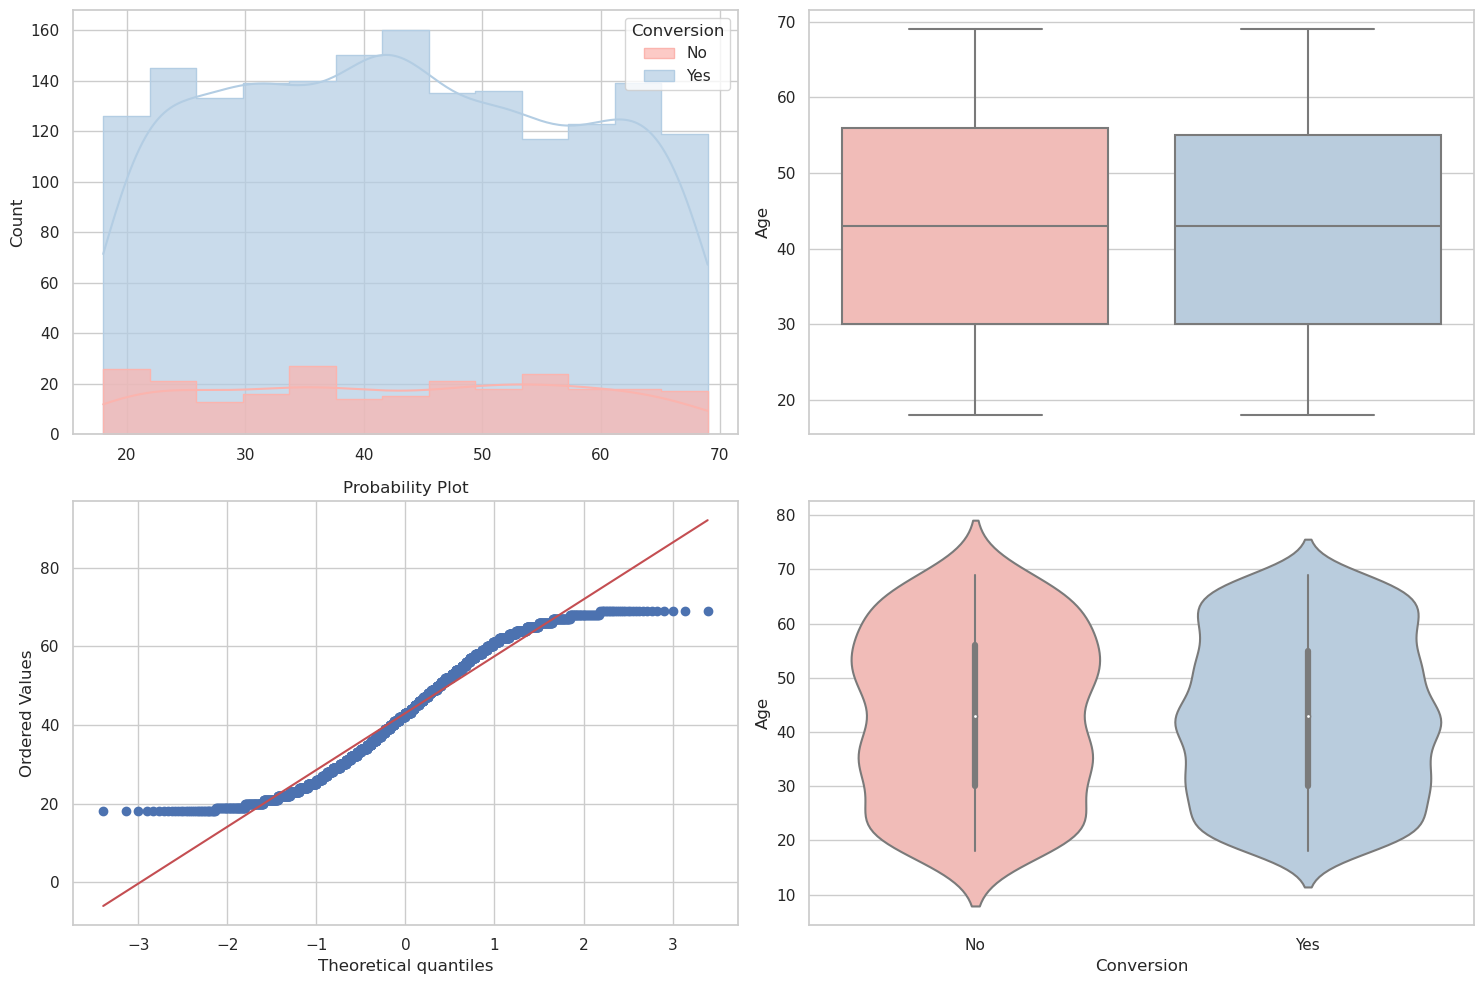

In [290]:
plot_numerical_vs_target(df, 'Age', 'Conversion')